In [1]:
pip install statsmodels

     |████████████████████████████████| 9.5 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 50.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")

### SPY Daily

#### "SPY" is the ticker for "S&P 500 EFT Trust".

In [3]:
import pandas as pd
spy_daily=pd.read_csv("SPY(daily).csv")
spy_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500


In [4]:
spy_daily["Daily_return(%)"]=(spy_daily["Close"]-spy_daily["Open"])*100/spy_daily["Open"]
spy_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return(%)
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200,-0.071073
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500,0.639659
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300,0.282686
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400,0.914849
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500,0.069493


Statistics=0.914, p=0.000
Sample does not look Gaussian (reject H0)


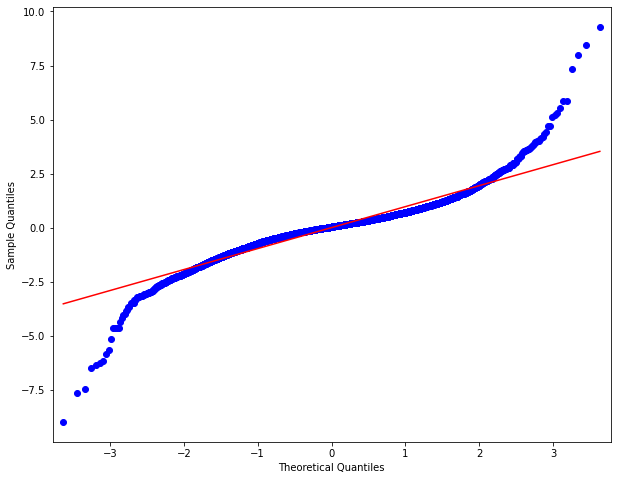

In [5]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

stat, p = shapiro(spy_daily["Daily_return(%)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

plt.rc("figure", figsize=(10,8))
qqplot(spy_daily["Daily_return(%)"], line='s')
plt.show()

In [21]:
from scipy.stats import kurtosis
kurtosis(spy_daily["Daily_return(%)"])

8.999417831285127

### SPY Weekly

In [6]:
spy_weekly=pd.read_csv("SPY(weekly).csv")
spy_weekly

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-25,43.968750,43.968750,43.750000,43.937500,25.968958,1003200
1,1993-02-01,43.968750,45.093750,43.968750,44.968750,26.578478,2234800
2,1993-02-08,44.968750,45.125000,44.531250,44.593750,26.356831,1159800
3,1993-02-15,44.468750,44.468750,42.812500,43.562500,25.747307,998700
4,1993-02-22,43.687500,44.437500,43.468750,44.406250,26.246014,1024300
...,...,...,...,...,...,...,...
1459,2021-01-11,377.850006,381.130005,373.700012,375.700012,375.700012,306063500
1460,2021-01-18,378.339996,384.950012,376.750000,382.880005,382.880005,213885700
1461,2021-01-25,383.670013,385.850006,368.269989,370.070007,370.070007,457234900
1462,2021-02-01,373.720001,388.470001,370.380005,387.709991,387.709991,288458300


In [7]:
spy_weekly["Weekly_return(%)"]=(spy_weekly["Close"]-spy_weekly["Open"])*100/spy_weekly["Open"]
spy_weekly

,Date,Open,High,Low,Close,Adj Close,Volume,Weekly_return(%)
0,1993-01-25,43.968750,43.968750,43.750000,43.937500,25.968958,1003200,-0.071073
1,1993-02-01,43.968750,45.093750,43.968750,44.968750,26.578478,2234800,2.274343
2,1993-02-08,44.968750,45.125000,44.531250,44.593750,26.356831,1159800,-0.833912
3,1993-02-15,44.468750,44.468750,42.812500,43.562500,25.747307,998700,-2.037948
4,1993-02-22,43.687500,44.437500,43.468750,44.406250,26.246014,1024300,1.645207
...,...,...,...,...,...,...,...,...
1459,2021-01-11,377.850006,381.130005,373.700012,375.700012,375.700012,306063500,-0.569007
1460,2021-01-18,378.339996,384.950012,376.750000,382.880005,382.880005,213885700,1.199981
1461,2021-01-25,383.670013,385.850006,368.269989,370.070007,370.070007,457234900,-3.544714
1462,2021-02-01,373.720001,388.470001,370.380005,387.709991,387.709991,288458300,3.743442


Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)


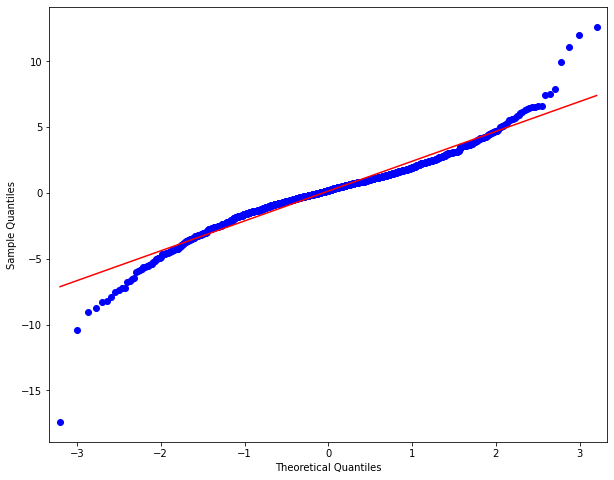

In [8]:
stat, p = shapiro(spy_weekly["Weekly_return(%)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
plt.rc("figure", figsize=(10,8))
qqplot(spy_weekly["Weekly_return(%)"], line='s')
plt.show()

In [22]:
kurtosis(spy_weekly["Weekly_return(%)"])

5.193446570785797

### SPY Monthly

In [9]:
spy_monthly=pd.read_csv("SPY (monthly).csv")
spy_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-02-01,43.968750,45.125000,42.812500,44.406250,26.246014,5417600
1,1993-03-01,44.562500,45.843750,44.218750,45.187500,26.707754,3019200
2,1993-04-01,45.250000,45.250000,43.281250,44.031250,26.147274,2697200
3,1993-05-01,44.093750,45.656250,43.843750,45.218750,26.852465,1808000
4,1993-06-01,45.375000,45.812500,44.218750,45.062500,26.759666,3438000
...,...,...,...,...,...,...,...
332,2020-10-01,337.690002,354.019989,322.600006,326.540009,325.153992,1629246900
333,2020-11-01,330.200012,364.380005,327.239990,362.059998,360.523224,1535244300
334,2020-12-01,365.570007,378.459991,362.029999,373.880005,372.293060,1344969200
335,2021-01-01,375.309998,385.850006,364.820007,370.070007,370.070007,1402215700


In [10]:
spy_monthly["Monthly_return(%)"]=(spy_monthly["Close"]-spy_monthly["Open"])*100/spy_monthly["Open"]
spy_monthly

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return(%)
0,1993-02-01,43.968750,45.125000,42.812500,44.406250,26.246014,5417600,0.995025
1,1993-03-01,44.562500,45.843750,44.218750,45.187500,26.707754,3019200,1.402525
2,1993-04-01,45.250000,45.250000,43.281250,44.031250,26.147274,2697200,-2.693370
3,1993-05-01,44.093750,45.656250,43.843750,45.218750,26.852465,1808000,2.551382
4,1993-06-01,45.375000,45.812500,44.218750,45.062500,26.759666,3438000,-0.688705
...,...,...,...,...,...,...,...,...
332,2020-10-01,337.690002,354.019989,322.600006,326.540009,325.153992,1629246900,-3.301843
333,2020-11-01,330.200012,364.380005,327.239990,362.059998,360.523224,1535244300,9.648693
334,2020-12-01,365.570007,378.459991,362.029999,373.880005,372.293060,1344969200,2.273162
335,2021-01-01,375.309998,385.850006,364.820007,370.070007,370.070007,1402215700,-1.396177


Statistics=0.975, p=0.000
Sample does not look Gaussian (reject H0)


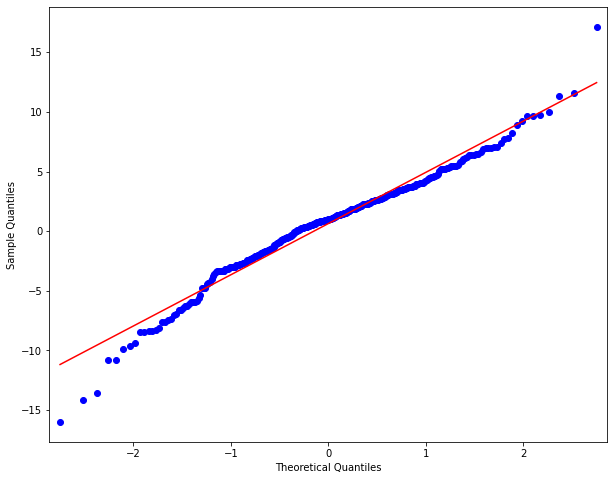

In [11]:
stat, p = shapiro(spy_monthly["Monthly_return(%)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
plt.rc("figure", figsize=(10,8))
qqplot(spy_monthly["Monthly_return(%)"], line='s')
plt.show()

In [23]:
kurtosis(spy_monthly["Monthly_return(%)"])

1.5024114463336655

### U.S. Treasury

In [12]:
df1=pd.read_csv("FRB_H15.csv")
df1

,Time Period,1_Month,3_Month,6_Month,1_Year,2_Year,3_Year,5_Year,7_Year,10_Year,20_Year,30_Year
0,1/2/1962,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1/3/1962,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1/4/1962,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1/5/1962,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1/8/1962,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14754,2/1/2021,0.06,0.07,0.08,0.08,0.11,0.17,0.42,0.76,1.09,1.66,1.84
14755,2/2/2021,0.04,0.07,0.08,0.08,0.11,0.18,0.45,0.79,1.12,1.69,1.87
14756,2/3/2021,0.03,0.04,0.06,0.08,0.11,0.19,0.46,0.81,1.15,1.73,1.92
14757,2/4/2021,0.03,0.04,0.06,0.07,0.11,0.18,0.46,0.81,1.15,1.75,1.93


### 30-Year U.S.Treasury bond

In [13]:
thirty_year=df1[["Time Period","30_Year"]].dropna()
thirty_year

,Time Period,30_Year
3770,2/15/1977,7.70
3771,2/16/1977,7.67
3772,2/17/1977,7.67
3773,2/18/1977,7.76
3774,2/22/1977,7.77
...,...,...
14754,2/1/2021,1.84
14755,2/2/2021,1.87
14756,2/3/2021,1.92
14757,2/4/2021,1.93


Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)


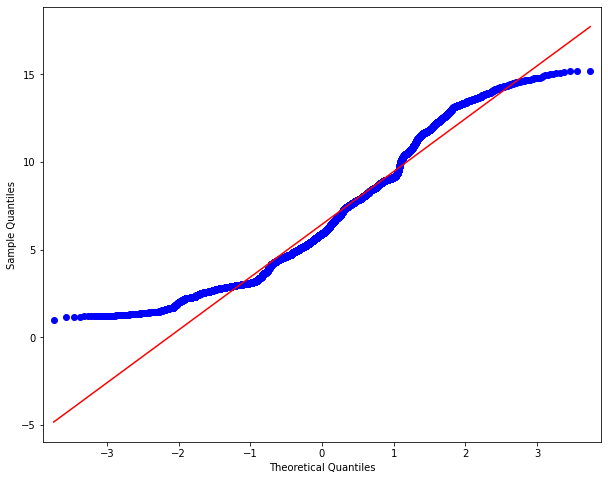

In [14]:
stat, p = shapiro(thirty_year["30_Year"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
plt.rc("figure", figsize=(10,8))
qqplot(thirty_year["30_Year"], line='s')
plt.show()

In [24]:
kurtosis(thirty_year["30_Year"])

-0.2782284201558318

### 20-Year U.S. Treasury bond

Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)


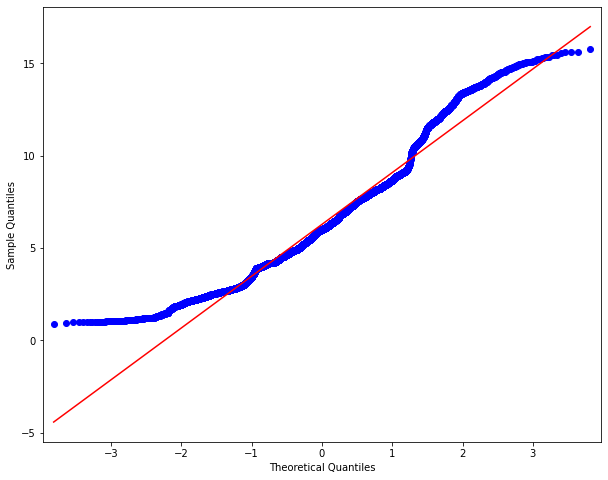

In [15]:
twenty_year=df1[["Time Period","20_Year"]].dropna()
stat, p = shapiro(twenty_year["20_Year"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

plt.rc("figure", figsize=(10,8))
qqplot(twenty_year["20_Year"], line='s')
plt.show()

In [25]:
kurtosis(twenty_year["20_Year"])

0.3175372101643341

### U.S. Treasury monthly

In [16]:
import datetime
df1["Year"]=pd.DatetimeIndex(df1["Time Period"]).year
df1["Month"]=pd.DatetimeIndex(df1["Time Period"]).month
df1.head()

,Time Period,1_Month,3_Month,6_Month,1_Year,2_Year,3_Year,5_Year,7_Year,10_Year,20_Year,30_Year,Year,Month
0,1/2/1962,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN,1962,1
1,1/3/1962,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN,1962,1
2,1/4/1962,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN,1962,1
3,1/5/1962,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN,1962,1
4,1/8/1962,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN,1962,1


In [17]:
years=set(df1["Year"])
df2=pd.DataFrame(columns=["Year","Month","20_Year","30_Year"])
for year in years:
    df_yr=df1[df1["Year"]==year]
    monthly=pd.DataFrame(df_yr.groupby("Month")["20_Year","30_Year"].mean()).reset_index()
    year=pd.concat([pd.DataFrame({"Year":[year]})]*len(monthly),axis=0).reset_index(drop=True)
    average=pd.concat([year,monthly],axis=1)
    df2=df2.append(average)

In [18]:
df2

,Year,Month,20_Year,30_Year
0,1962,1,4.096364,NaN
1,1962,2,4.117778,NaN
2,1962,3,4.040000,NaN
3,1962,4,3.927000,NaN
4,1962,5,3.915909,NaN
...,...,...,...,...
9,2020,10,1.340952,1.568571
10,2020,11,1.401579,1.615263
11,2020,12,1.466364,1.670455
0,2021,1,1.630000,1.824737


### 20-Year U.S. Treasury monthly

Statistics=0.963, p=0.000
Sample does not look Gaussian (reject H0)


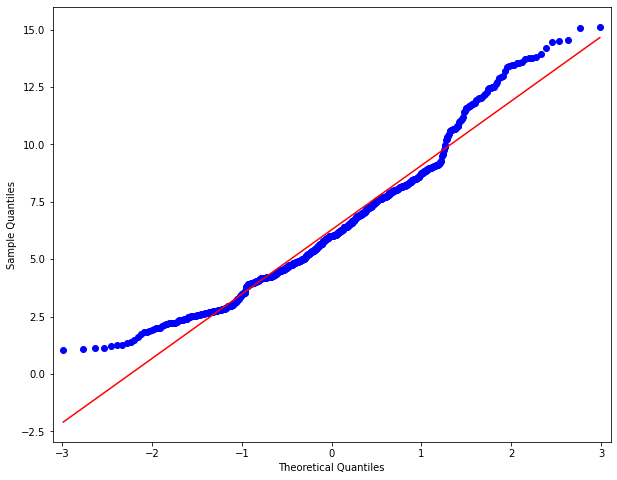

In [19]:
stat, p = shapiro(df2["20_Year"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

plt.rc("figure", figsize=(10,8))
qqplot(df2["20_Year"], line='s')
plt.show()

In [27]:
kurtosis(df2["20_Year"])

0.2954015930632137

### 30-Year U.S. Treasury Monthly

Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)


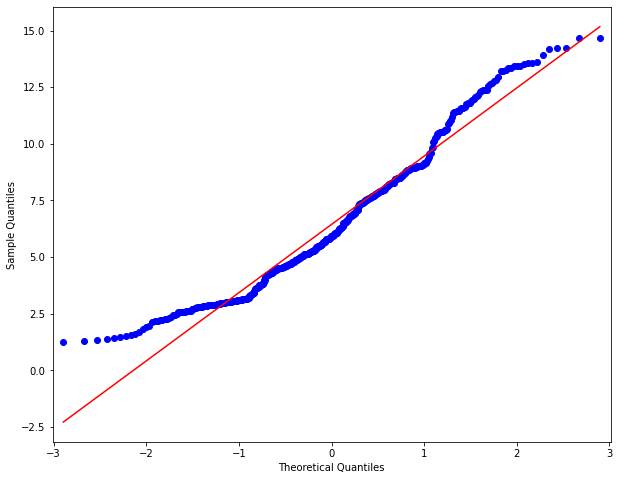

In [20]:
year30=df2[["Year","Month","30_Year"]].dropna()
stat, p = shapiro(year30["30_Year"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

plt.rc("figure", figsize=(10,8))
qqplot(year30["30_Year"], line='s')
plt.show()

In [28]:
kurtosis(df2["30_Year"].dropna())

-0.29793918687079657